<a href="https://colab.research.google.com/github/laxmena/100MLProjects/blob/master/Project3%20-%20Implementing%20Regression%20Algorithms%20from%20Scratch/Worksheets/Linear_Regression_Worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('iris.data', header=None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


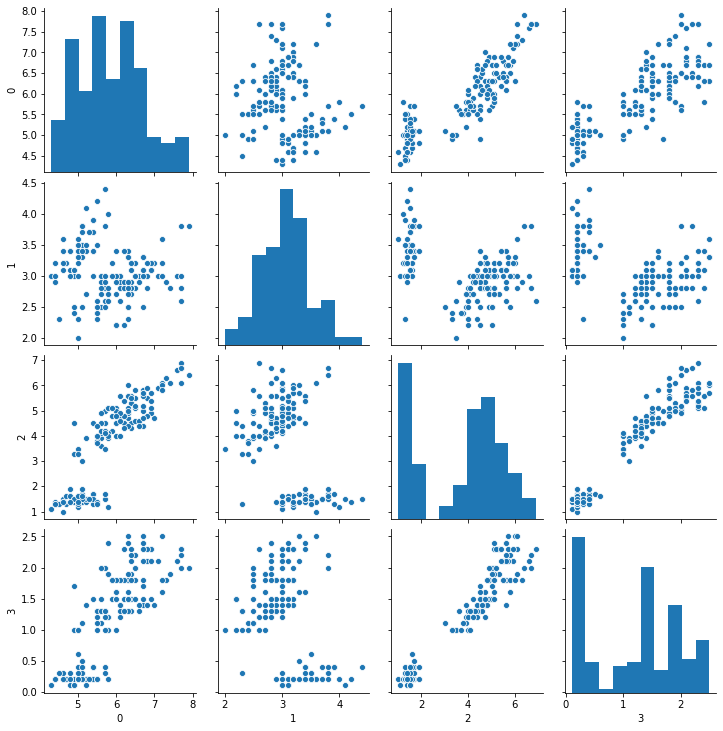

In [4]:
import seaborn as sns
df = dataset.iloc[:]
sns.pairplot(df)

From looking at the visualization, we can see that petal length and petal width has a positive linear correlation between each other. 

If the petal length increases, the petal width increases too.

So, I'll select Petal Length and Width to build a linear model that represents the data, and try to predict petal width based on Petal length.

## Building A Linear Model from Scratch

- [X] Initialize Weight, Learning_rate, epoch, bias
- [X] Cost Functiopn
- [X] Implment Predict function
- [X] Implement Gradiant Descent
- [X] Plot
- [X] Implement Fit method

In [289]:
# Predict Function
def predict(X):
  return np.dot(X, coef_)

In [309]:
def gradient_descent(X, y, n_iter, eta, coef_, intercept_):
  past_coef_ = [coef_]
  past_cost = []
  coef = coef_

  for i in range(n_iter):
    pred = predict(X)
    cost_ = cost_function(y, pred)
    past_cost.append(cost_)
    error = pred - y
    update = eta * (1/n) * np.dot(X.T, error)
    # print("Cost: {} || Coeff Update : {} ==> {}".format(cost_, coef, coef-update))
    coef = coef - update
    past_coef_.append(coef)
  return (past_coef_, past_cost)

In [308]:
def fit(X, y):
  X = np.c_[np.ones(len(X)), X]
  global coef_, intercept_
  past_coef_, past_cost = gradient_descent(X, y, n_iter, eta, coef_, intercept_)

In [297]:
coef_

array([0.69646919, 0.28613933])

In [299]:
y_pred = predict(np.c_[np.ones(len(X_test)),X_test])
y_pred

array([2.15577979, 1.84102653, 1.09706425, 2.499147  , 1.12567819,
       2.4133052 , 1.06845032, 2.04132406, 2.06993799, 1.84102653,
       2.29884946, 1.98409619, 2.04132406, 2.01271013, 2.04132406,
       1.12567819, 1.98409619, 1.95548226, 1.09706425, 1.06845032,
       2.09855193, 1.98409619, 1.24013392, 1.09706425, 2.06993799,
       0.98260852, 1.24013392, 1.92686833, 1.64072899, 1.15429212,
       2.27023553, 1.98409619, 1.12567819, 2.09855193, 2.29884946,
       1.81241259, 1.18290606, 2.15577979])

In [300]:
r2_score(y_test, y_pred)

0.057212716570256505

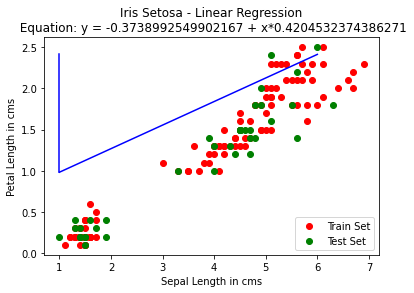

In [307]:
plt.scatter(X_train, y_train, color='red',label="Train Set")
plt.scatter(X_test, y_test, color='green',label="Test Set")
xx = np.arange(start=X.min(), stop=X.max(), step=1)
xx = xx.reshape(len(xx), 1)
xx = np.c_[np.ones(len(xx)),xx]
plt.plot(xx, predict(xx), color='blue')
plt.xlabel("Sepal Length in cms")
plt.ylabel("Petal Length in cms")
plt.title("Iris Setosa - Linear Regression\n Equation: y = {} + x*{}".format(lr.intercept_, lr.coef_[0]))
plt.legend()
plt.show()

In [19]:
# Cost Function
def cost_function(target, prediction):
  n = target.size
  print("Cost Function: ")
  print(n)
  error = (prediction - target)
  cost = (1/(2*n)) * np.dot(error.T, error)
  return cost

# def cost_function(error, m):
#   cost = 1/(2*m) * np.dot(error.T, error)
#   return cost

In [41]:
X_train1 = np.c_[np.ones(X_train.shape[0]), X_train] 
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y_train.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = cost_function(y, prediction)
        # cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs


def predict(X, coef_):
  X = np.c_[np.ones(X.size), X]
  print(X.shape)
  return np.dot(X, coef_)

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(X_train1, y_train, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: -0.34, 0.41


In [42]:
# xx1 = np.c_[np.ones(len(X_test)), X_test]
# y_pred1 = np.dot(xx1, np.array(theta))
y_pred1 = predict(X_test, np.array(theta))

(38, 2)


In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.8928215021430083

In [221]:
class LinearRegression:
  def __init__(self, eta=0.01, n_iter=2000, random_state=123):
    self.eta = eta
    self.n_iter = n_iter
    np.random.seed(random_state)
    self.w_ = np.array([])
    self.cost_history_ = []
    self.w_history_ = []

  def add_intercept(self, X):
    return np.c_[np.ones(X.size), X]

  def fit(self, X, y):
    X_mod = self.add_intercept(X)
    w_ = np.random.rand(X_mod.shape[1])
    print(w_)
    self.w_, cost = self.gradient_descent(X_mod, y, w_)
    print(self.w_)
    return self

  def gradient_descent(self, X, y, w):
    n = y.size
    for _ in range(self.n_iter):
      y_pred = np.dot(X, w)
      error = y_pred - y
      cost = (1/(2*n)) * np.dot(error.T, error)
      w = w - (self.eta * (1/n) * np.dot(X.T, error))

      self.cost_history_.append(cost)
      self.w_history_.append(w)
    return w, cost

  def predict(self, X):
    X = self.add_intercept(X)
    return np.dot(X, self.w_)


In [222]:
lr = LinearRegression()

In [223]:
lr = lr.fit(X_train, y_train)
lr.w_

[0.69646919 0.28613933]
[-0.3417524   0.41346027]


array([-0.3417524 ,  0.41346027])

In [224]:
y_pred = lr.predict(X_test)

In [225]:
r2_score(y_test, y_pred)

0.8928215021430083

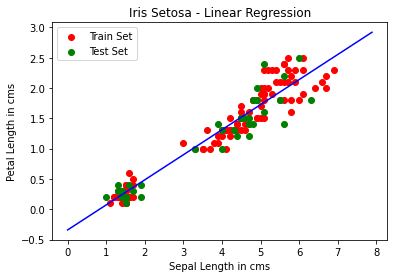

In [226]:
plt.scatter(X_train, y_train, color='red',label="Train Set")
plt.scatter(X_test, y_test, color='green',label="Test Set")
xx = np.arange(start=X.min()-1, stop=X.max()+1, step=0.01)
xx = xx.reshape(len(xx), 1)
plt.plot(xx, lr.predict(xx), color='blue')
plt.xlabel("Sepal Length in cms")
plt.ylabel("Petal Length in cms")
plt.title("Iris Setosa - Linear Regression")
plt.legend()
plt.show()